<a href="https://colab.research.google.com/github/janamoumita1997/Leaf_and_skin_Disease_classification/blob/main/model2_leaf_and_defiency_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Dropout
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/skin_plant_disease/dataset/leaf.zip" -d"/content"

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
traindir = "/content/leaf/train"
validdir = "/content/leaf/valid"
# testdir = "../input/new-plant-diseases-dataset/test/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 1039 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [5]:
class_dict = training_set.class_indices
print(class_dict)

{'Defiency': 0, 'Disease': 1, 'healthy': 2}


In [6]:
li = list(class_dict.keys())
print(li)

['Defiency', 'Disease', 'healthy']


In [7]:
train_num = training_set.samples
valid_num = valid_set.samples

In [8]:


base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False



58889256/58889256 [==============================] - 0s 0us/step


In [9]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(3,activation='softmax'))
classifier.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 3)                 75267     
                                                                 
Total params: 14,789,955
Trainable params: 75,267
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         )
#saving model
#filepath="Mymodel.hdf5"
#model.save(filepath)

Epoch 1/5
8/8 [==============================] - 30s 2s/step - loss: 1.1714 - accuracy: 0.5547
Epoch 2/5
8/8 [==============================] - 14s 2s/step - loss: 0.5194 - accuracy: 0.7891
Epoch 3/5
8/8 [==============================] - 14s 2s/step - loss: 0.2698 - accuracy: 0.8990
Epoch 4/5
8/8 [==============================] - 13s 1s/step - loss: 0.1931 - accuracy: 0.9276
Epoch 5/5
8/8 [==============================] - 13s 1s/step - loss: 0.1416 - accuracy: 0.9572


In [20]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

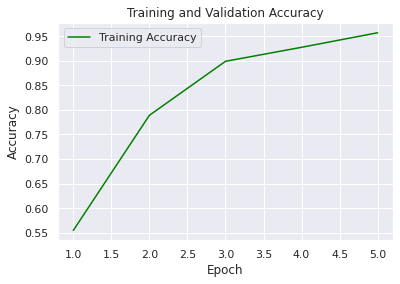

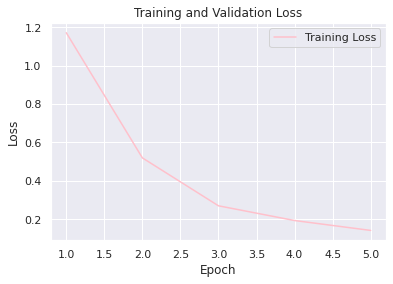

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 [==============================] - 0s 17ms/step


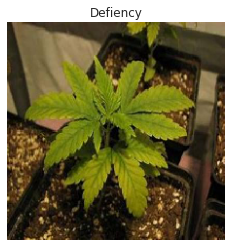

In [19]:
# predicting an image
# from keras.preprocessing import image
import numpy as np
image_path = "/content/OIP-sRydmAY1Km0IGlXgYbh2TAHaFj_jpg.rf.2b7b36a6f3275117d65256f7ba59892c.jpg"
new_img = load_img(image_path, target_size=(224, 224))
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()